In [23]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

 ../InputData/zT_Rebin_8_006zT06zTDist1Better/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTDist1Better/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTDist1Better/pPb_SE_L0_Correlation_GMB_Ratio.root


In [24]:
print ZYAM_Min_i
print dPhi_Bins[ZYAM_Min_i]
print ZYAM_Max_i
print dPhi_Bins[ZYAM_Max_i]
print(pTbins)
print(delta_phi_centers)
print(dphi_start_integral)

2
0.392699081699
8
1.57079632679
[12, 40]
[0.09817477042468103, 0.2945243112740431, 0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154, 1.6689710972195777, 1.8653206380689396, 2.061670178918302, 2.2580197197676637, 2.454369260617026, 2.6507188014663883, 2.84706834231575, 3.043417883165112]
14


In [25]:
print pTbins
print zTbins

[12, 40]
[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


**root to numpy**

In [26]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [27]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [28]:
#Plot_Sub_UB_Overlay(Corrs)

In [29]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [30]:
#Plot_UB()

**Pedestal Subtraction**

In [31]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [32]:
Ped_Sub_After_Cs(Corrs)

In [33]:
#Plot_pp_pPb_Cs(Corrs)
#Plot_pp_pPb_Cs_Individual(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [34]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 2
[-0.00564624  0.04601751 -0.02068508 -0.01479503  0.01007921 -0.00847903
  0.00820759  0.02567234  0.00241048 -0.00272673  0.02850851  0.02329264
  0.05012009  0.09104085  0.08909819  0.04307599]
pp
0.336579 +\- 0.092747 +\- 0.035348
0.2948929905584244
non-dphi rate 0.042
p-Pb
0.625736 +\- 0.100096 +\- 0.043380
0.17434112001590543
non-dphi rate 0.051


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

<Figure size 1728x864 with 0 Axes>

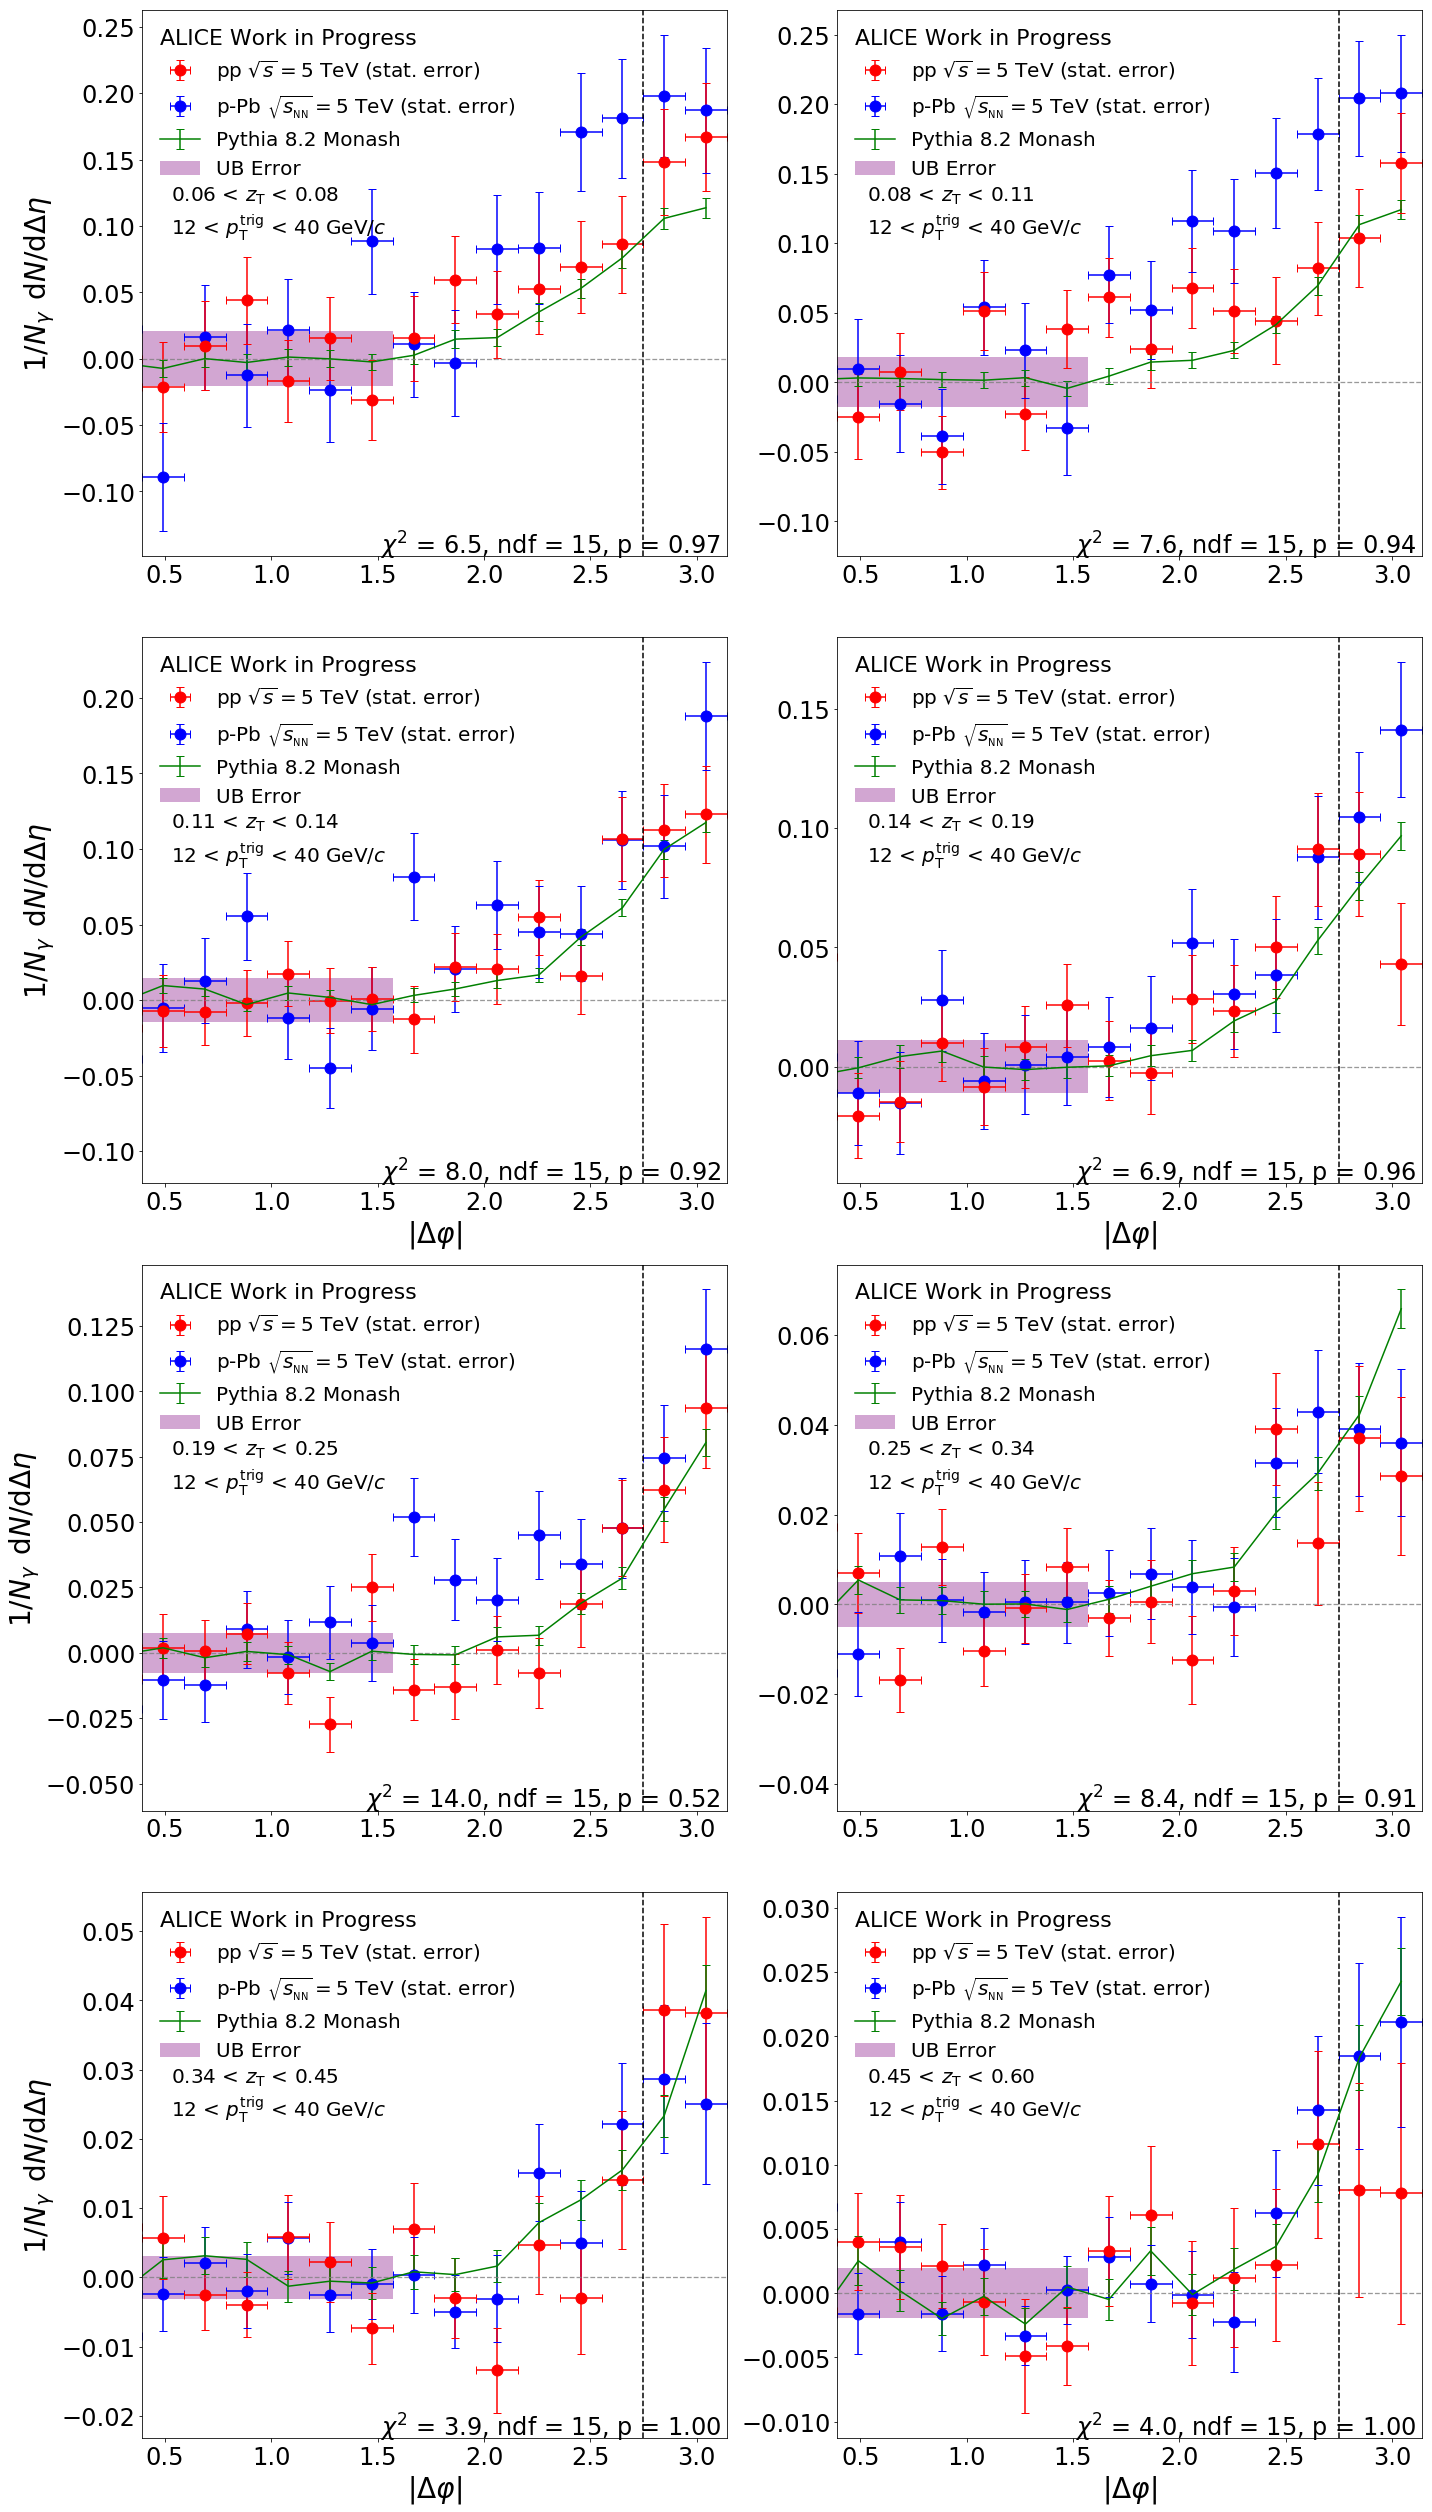

In [35]:
Avg_Corr = Cs_Weighted_Average(Corrs)
Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [36]:
reload(functions_correlations)
from functions_correlations import *

In [37]:
Frags = Get_Fragmentation(Corrs)
print Frags.keys()
LaTeX_Results_Summary(Frags)
LaTeX_Ratio_Systematics(Frags)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

['pp_purity_FF_Errors', 'p-Pb_FF_Errors', 'pp_FF_Errors', 'p-Pb_UE_FF_Errors', 'pp_FF', 'p-Pb_FF', 'pp_UE_FF_Errors', 'p-Pb_purity_FF_Errors']
[[0.65575313 0.42056876 0.25665986 0.14459605 0.07770264 0.03957786
  0.01973676 0.01036822]]
                        LaTeX Table
Source   &  pp data & p--Pb~data  \\
Statistical Uncertainty & 20\%-85\% & 16\%-31\% \\
\hline
Purity & 15\%-15\% & 15\%-15\% \\
UE & 6\%-20\% & 6\%-10\% \\
Tracking Efficiency &  5\% & 5\%  \\ 
pp


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 27\% & 12\% & 21\% & 7\%\\
0.08 - 0.11 & 26\% & 11\% & 21\% & 7\%\\
0.11 - 0.14 & 28\% & 11\% & 21\% & 7\%\\
0.14 - 0.19 & 34\% & 13\% & 21\% & 7\%\\
0.19 - 0.25 & 27\% & 9\% & 21\% & 7\%\\
0.25 - 0.34 & 49\% & 14\% & 21\% & 7\%\\
0.34 - 0.45 & 39\% & 10\% & 21\% & 7\%\\
0.45 - 0.60 & 90\% & 21\% & 21\% & 7\%\\
p-Pb


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 27\

In [62]:
reload(functions_fragmentation)
from functions_fragmentation import *

['pp_Combined_FF_Errors', 'p-Pb_purity_Uncertainty', 'p-Pb_Combined_FF', 'pp_Combined_FF', 'pp_purity_Uncertainty', 'p-Pb_Combined_FF_Errors']


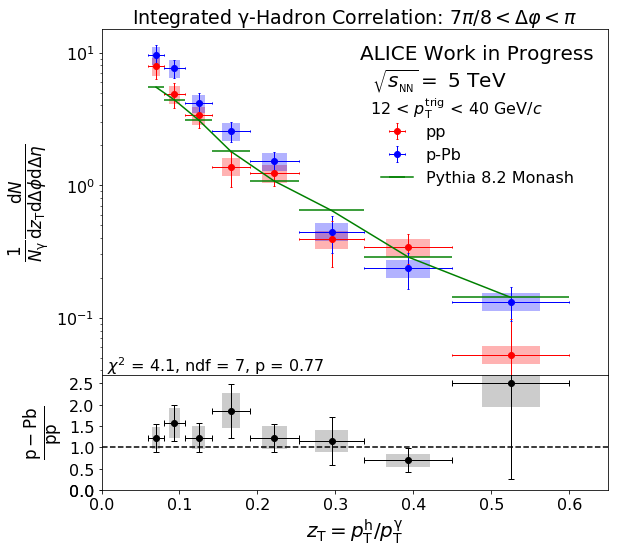

pp_purity_FF_Errors:
1.1617, 0.7134, 0.4955, 0.2029, 0.1825, 0.0575, 0.0501, 0.0078, 

p-Pb_FF_Errors:
1.8289, 1.2084, 0.7799, 0.4463, 0.2583, 0.1391, 0.0724, 0.0373, 

pp_FF_Errors:
1.5620, 1.0219, 0.6840, 0.4060, 0.2534, 0.1474, 0.0847, 0.0449, 

p-Pb_UE_FF_Errors:
0.8020, 0.5201, 0.3243, 0.1775, 0.0936, 0.0449, 0.0189, 0.0077, 

pp_FF:
7.8818, 4.8404, 3.3618, 1.3768, 1.2382, 0.3902, 0.3397, 0.0527, 

p-Pb_FF:
9.6261, 7.6279, 4.1380, 2.5596, 1.5148, 0.4468, 0.2377, 0.1321, 

pp_UE_FF_Errors:
0.6558, 0.4206, 0.2567, 0.1446, 0.0777, 0.0396, 0.0197, 0.0104, 

p-Pb_purity_FF_Errors:
1.4188, 1.1243, 0.6099, 0.3773, 0.2233, 0.0658, 0.0350, 0.0195, 



In [48]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

print(Combined_Frags.keys())

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)


printthis = False
if printthis == True:
    print("zT Centers:")
    for izt in zT_centers:
        print("%1.2f,"%(izt)),
    print("")

    print("zT Widths:")
    for izt in zT_widths:
        print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [40]:
a = 730/521
a = 0.0730/0.0521
print(1.0/a)
7.7810
b = 1.1465/7.7810
print(b)

0.713698630137
0.147346099473


In [41]:
LaTeX_Table(Combined_Frags)

zT_Rebin_8_006zT06zTDist1Better Intg. 7\pi/8

NameError: global name 'iminuit' is not defined

<Figure size 864x432 with 0 Axes>

[0.27072539 0.22279171 0.18080075 0.149835   0.13755363 0.14866179
 0.17885332 0.22042129 0.26812578 0.31922747 0.3723302  0.42668751
 0.48187502 0.53763715 0.59381202 0.65029269 0.70700588 0.76389979
 0.82093686 0.87808918]
1.11273051217


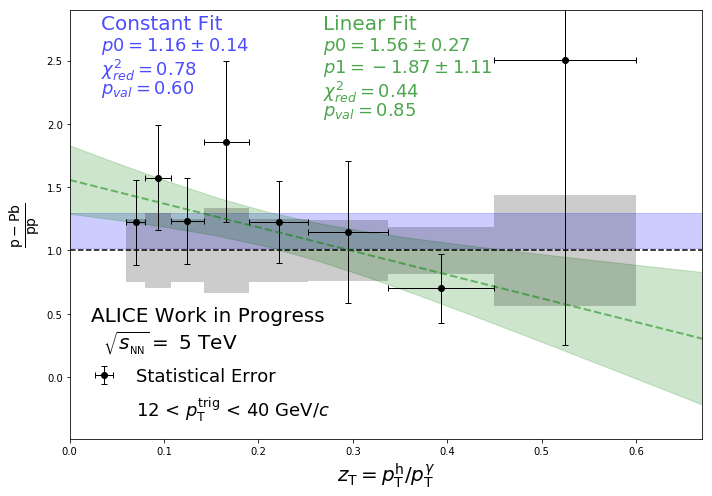

                Central Values:
[1.22129942 1.57587145 1.23088688 1.85910803 1.22345159 1.14490362
 0.69966213 2.50712321]

                Satistical Uncertainty Absolute:
[0.33529388 0.41594938 0.34136535 0.63688141 0.32588946 0.56049331
 0.27547479 2.25155284]

               Relative Satistical Uncertainty:
[0.27453864 0.2639488  0.27733283 0.34257364 0.26636891 0.48955501
 0.39372546 0.8980623 ]

                Ratio Uncertainty from Purity:
[0.23265227 0.27508721 0.23374733 0.31114076 0.23289779 0.2240537
 0.17988492 0.39783702]

                Ratio Uncertainty from Single Track Efficiency:
[0.08635891 0.11143094 0.08703685 0.13145879 0.08651109 0.08095691
 0.04947358 0.17728038]

                Full Systematic Uncertainty:
[0.24816313 0.2967993  0.2494258  0.33777209 0.24844627 0.23823115
 0.18656425 0.43554865]

                LaTeX Table:
$\zt$ range & pp & p--Pb & p--Pb/pp \\
0.06 - 0.08 & 7.882 $\pm$ 1.562 & 9.626 $\pm$ 1.829 & 1.221 $\pm$ 0.335 \\
0.08 - 0.11 & 4.840 $

In [63]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

In [ ]:
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4","15\pi/16, \mathrm{R} = 0.2")

Compare_FF_Integration(ranges,strings)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [ ]:
save_name = "pT_Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","pT_Rebin_2_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["1 pT Bins","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "zT_Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","zT_Rebin_7_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["8 pT Bins [Default]","7 zT Bins", "9zT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "ZYAM_Variation"
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam"]
string_descriptions = ["Default","Smaller ZYAM Avg Range"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]

strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Old","New"]

colors = ["red","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

## Compare Different pT Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)